<a href="https://colab.research.google.com/github/ImMohammedFaheem/Machine-Learning-Projects/blob/main/Supervised/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
data.shape

(2290, 6)

In [ ]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

positive correlation

negative correlation

In [ ]:
correlation = data.corr()

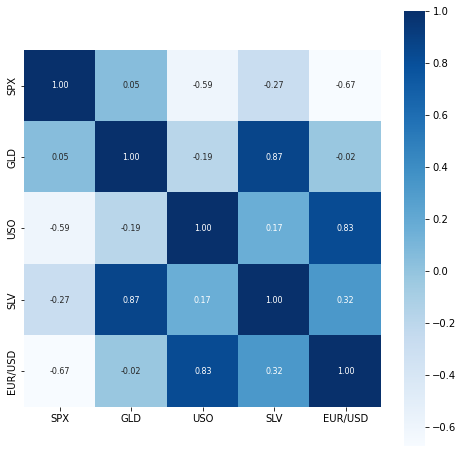

In [ ]:
#constructing a Heatmap To Understand The Correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square = True ,fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


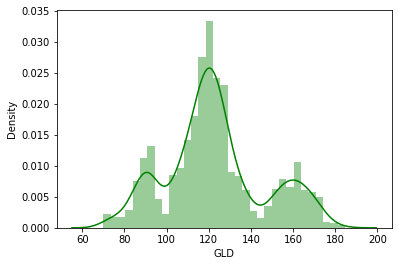

In [ ]:
sns.distplot(data['GLD'], color='green')

In [ ]:
x = data.drop(['Date', 'GLD'], axis=1)
y = data['GLD']

In [ ]:
x


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
x_train.shape

(1832, 4)

In [ ]:
x_test.shape

(458, 4)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(x_test)

In [ ]:
test_data_prediction

array([168.6384996 ,  82.08879978, 116.0023002 , 127.60910084,
       120.70120093, 154.8460986 , 150.32739775, 125.97630091,
       117.56019869, 126.11970037, 116.74330076, 171.36390105,
       141.70319755, 167.75409806, 115.26469977, 117.58600071,
       138.39630265, 170.15150121, 159.04650334, 159.40890001,
       155.10069985, 125.33679991, 175.78150009, 157.00440369,
       125.15840037,  94.00709975,  77.59740002, 120.52909979,
       119.07769953, 167.48140015,  88.01500033, 125.11550032,
        91.32310068, 117.75320009, 121.08219934, 135.97840034,
       115.68550114, 115.07780049, 146.7668997 , 107.19070099,
       104.69440242,  87.14539765, 126.50170036, 117.75519957,
       153.40989915, 119.61539999, 108.47750021, 108.1075984 ,
        93.08700026, 127.13239762,  74.87670036, 113.69939902,
       121.08890057, 111.17909922, 118.94019882, 120.45359965,
       159.9572016 , 168.24780089, 147.11609724,  85.72339855,
        94.41030045,  86.84439887,  90.34270003, 118.91

In [ ]:
# R Square Error
error_score = metrics.r2_score(y_test, test_data_prediction)

In [ ]:
print(error_score)

0.989599775246557


Comparing The Actual Values and Predicted Values

In [ ]:
Y_test= list(y_test)

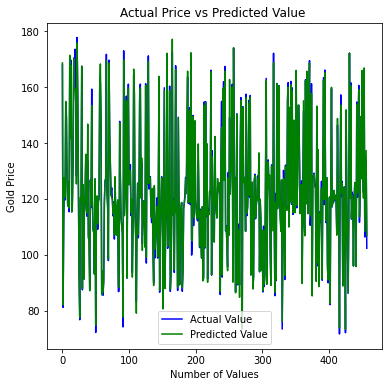

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(Y_test, color='blue', label='Actual Value')
ax.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Value ')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

Therefore, We Successfully Created a Machine Model Which Can Predict Gold Price Based On That Day Siver Price, Oil Price, Euro Usd Ratio and SPX Values